In [8]:
import os
import pickle

In [9]:
Twitter=pickle.load(open('secret_twitter_credentials.pkl','rb'))

In [10]:
import twitter

auth = twitter.oauth.OAuth(Twitter['Access Token'],
                           Twitter['Access Token Secret'],
                           Twitter['Consumer Key'],
                           Twitter['Consumer Secret'])

twitter_api = twitter.Twitter(auth=auth)

print(twitter_api)

In [11]:
?twitter

In [12]:
print(twitter_api.statuses.home_timeline(count=5)[0]['text'])

RT @CVWickham: OSU is hiring a Data Analytics Program Director: https://t.co/PjtWS97Jhw Flexibility of academia + maintain connections with…


In [13]:
t_stream = twitter.TwitterStream(auth=auth)

In [14]:
twitter_iterator = t_stream.statuses.sample()

In [15]:
# for tweet in twitter_iterator:
#     print(tweet)

In [16]:
# from collections import Counter
# c = next(twitter_iterator)
# c

In [17]:
q = 'NBA Draft filter:verified'
n=100

search = twitter_api.search.tweets(q=q, count=n, result_type='recent')
statuses = search['statuses']

In [18]:
len(statuses)

100

In [19]:
# print(statuses)

In [20]:
## Getting status text
text = [s['text'] for s in statuses]
text = list(set(text))

In [21]:
print(len(text))
text

91


['Our obscenely early 2018 NBA Mock Draft. Get to know the super-talented crop of big men. (by @cstonehoops) https://t.co/rxeueAN2AM',
 "RT @dave_schilling: New ep of the B/R Mag Show podcast, with my interview with the guys from @ComedyCentral's @LegendsofCH @KingJosiah54 ht…",
 'Troy Caupain was not taken in the NBA draft, but a former #UC All-American has told Caupain to stay ready. Story coming @ENQSports',
 "The NBA Draft is over. Let's take a look at the biggest offseason storylines on the way. https://t.co/QsSizheGVl",
 'Boston #Celtics: 2017 NBA Draft grades https://t.co/fPpiqpnwEE -- @massey_evan via @HoopsHabit https://t.co/ZFhnIcFaCo',
 '#New_York_Knicks: #2017_NBA_Draft grades https://t.co/nS9mKuysN2 via @hoopshabit https://t.co/APrOwcuRsb',
 "Thursday night's @NBADraft in Brooklyn was historic for both @UCLA and the @pac12.\n\nhttps://t.co/NV7J5JxAsS",
 'As #Sixers fans left the #NBA Draft last night they were singing the 76ers theme song!\n\n"..1, 2, 3, 4, 5, Sixers...… h

In [22]:
import json
print(json.dumps(statuses[0], indent=1))

{
 "metadata": {
  "result_type": "recent",
  "iso_language_code": "en"
 },
 "in_reply_to_status_id_str": null,
 "user": {
  "default_profile_image": false,
  "is_translator": false,
  "friends_count": 611,
  "default_profile": false,
  "url": "https://t.co/bo2b9hnY35",
  "utc_offset": -10800,
  "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/632362935/l3lstib9h43cewp5wdcs.jpeg",
  "profile_sidebar_fill_color": "DDEEF6",
  "created_at": "Sat May 05 01:56:51 +0000 2012",
  "entities": {
   "description": {
    "urls": []
   },
   "url": {
    "urls": [
     {
      "expanded_url": "http://lakeshowlife.com",
      "indices": [
       0,
       23
      ],
      "url": "https://t.co/bo2b9hnY35",
      "display_url": "lakeshowlife.com"
     }
    ]
   }
  },
  "profile_sidebar_border_color": "C0DEED",
  "profile_background_color": "000000",
  "followers_count": 8141,
  "screen_name": "TheLakeShowLife",
  "profile_background_tile": false,
  "verified": true,


In [23]:
status_text = [status['text'] for status in statuses]
screen_names = [user_mention['screen_name'] 
                   for status in statuses
                       for user_mention in status['entities']['user_mentions']]
hashtags = [hashtag['text'] for status in statuses
               for hashtag in status['entities']['hashtags']]

# words in tweets
words = [word for st in status_text for word in st.split()]

In [24]:
print(json.dumps(status_text[0:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1)) 
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 "RT @Lakers: \u201cWhen he\u2019s on the floor, all four guys that are out there with him become better instantly.\" - Luke Walton\nhttps://t.co/devgqNR\u2026",
 "RT @esquire: What it's like to be 19 years old and then, suddenly, a millionaire https://t.co/mVz5NuFd9U #NBADraft https://t.co/96i91obRc8",
 "RT @esquire: What it's like to be 19 years old and then, suddenly, a millionaire https://t.co/mVz5NuFd9U #NBADraft https://t.co/96i91obRc8",
 "#New_York_Knicks: #2017_NBA_Draft grades https://t.co/nS9mKuysN2 via @hoopshabit https://t.co/APrOwcuRsb",
 "#Boston_Celtics: #2017_NBA_Draft grades https://t.co/OxItHlpGcn via @hoopshabit https://t.co/9R4phAeeOu"
]
[
 "Lakers",
 "esquire",
 "esquire",
 "HoopsHabit",
 "HoopsHabit"
]
[
 "NBADraft",
 "NBADraft",
 "New_York_Knicks",
 "2017_NBA_Draft",
 "Boston_Celtics"
]
[
 "RT",
 "@Lakers:",
 "\u201cWhen",
 "he\u2019s",
 "on"
]


In [25]:
from collections import Counter
for i in [words, screen_names, hashtags]:
    c = Counter(i)
    print(c.most_common()[:10]) # look at top-10
    print()

[('the', 83), ('NBA', 45), ('RT', 31), ('to', 26), ('Draft', 25), ('and', 25), ('of', 21), ('in', 19), ('a', 16), ('draft', 15)]

[('HoopsHabit', 5), ('NBA2K', 4), ('SBNation', 4), ('1070Bruno', 4), ('dandakich', 4), ('UW_MBB', 3), ('MarkelleF', 3), ('ChristianCaple', 3), ('ProducerKyle', 3), ('ChuckAndPuckKJR', 3)]

[('NBA', 11), ('NBADraft', 7), ('Pacers', 4), ('2017_NBA_Draft', 3), ('Draft', 2), ('Knicks', 2), ('Sixers', 2), ('ATLHawks', 1), ('SPORTS', 1), ('TarHeelFamily', 1)]



In [26]:
import nltk
import string

In [27]:
search_terms = ['NBA', 'nba', 'Draft', 'draft']
stopwords = nltk.corpus.stopwords.words('english')+list(string.punctuation)+search_terms

In [28]:
words = [i for i in words if i not in stopwords]

In [29]:
for i in [words, screen_names, hashtags]:
    c = Counter(i)
    print(c.most_common()[:10]) # look at top-10
    print()

[('RT', 31), ('2017', 12), ('Markelle', 12), ('#NBA', 11), ('Fultz', 10), ('trade', 9), ('via', 9), ('&amp;', 8), ('GM:', 8), ('Draft:', 8)]

[('HoopsHabit', 5), ('NBA2K', 4), ('SBNation', 4), ('1070Bruno', 4), ('dandakich', 4), ('UW_MBB', 3), ('MarkelleF', 3), ('ChristianCaple', 3), ('ProducerKyle', 3), ('ChuckAndPuckKJR', 3)]

[('NBA', 11), ('NBADraft', 7), ('Pacers', 4), ('2017_NBA_Draft', 3), ('Draft', 2), ('Knicks', 2), ('Sixers', 2), ('ATLHawks', 1), ('SPORTS', 1), ('TarHeelFamily', 1)]



In [30]:
import time

In [31]:
?time.sleep

In [32]:
i = 1
while(i<5):
    print(time.localtime().tm_sec)
    time.sleep(5)
    i+=1

56
1
6
11


In [35]:
twitter_api.trends.place(_id='23424977', exclude='hashtags')

[{'as_of': '2017-06-23T18:29:36Z',
  'created_at': '2017-06-23T18:25:02Z',
  'locations': [{'name': 'United States', 'woeid': 23424977}],
  'trends': [{'name': 'Saad',
    'promoted_content': None,
    'query': 'Saad',
    'tweet_volume': 59093,
    'url': 'http://twitter.com/search?q=Saad'},
   {'name': 'Johnny Depp',
    'promoted_content': None,
    'query': '%22Johnny+Depp%22',
    'tweet_volume': 176356,
    'url': 'http://twitter.com/search?q=%22Johnny+Depp%22'},
   {'name': 'Dayton Air Show',
    'promoted_content': None,
    'query': '%22Dayton+Air+Show%22',
    'tweet_volume': None,
    'url': 'http://twitter.com/search?q=%22Dayton+Air+Show%22'},
   {'name': 'Hjalmarsson',
    'promoted_content': None,
    'query': 'Hjalmarsson',
    'tweet_volume': None,
    'url': 'http://twitter.com/search?q=Hjalmarsson'},
   {'name': 'Stepan',
    'promoted_content': None,
    'query': 'Stepan',
    'tweet_volume': 10726,
    'url': 'http://twitter.com/search?q=Stepan'},
   {'name': 'Gabe 

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
trends = {}
woeid='23424977'
exclude=None#'hashtags'
how_long=1
while (how_long > 0):
    cur = twitter_api.trends.place(_id=woeid, exclude=exclude)[0]
    # print(json.dumps(cur, indent=1))
    trends_json = cur['trends']
    for i in trends_json:
    # if tred is not in dict, add it, otherwise update count	
        if i['name'] not in trends:
            if i['tweet_volume']:
                trends[i['name']] = i['tweet_volume']
        elif i['name'] in trends:
            trends[i['name']] = i['tweet_volume']
    if how_long > 1:
        time.sleep(3)
    how_long -= 1
#     print(trends)
    time_ = cur['as_of'].split('T')
#     print(time_)
# print(cur['as_of'])

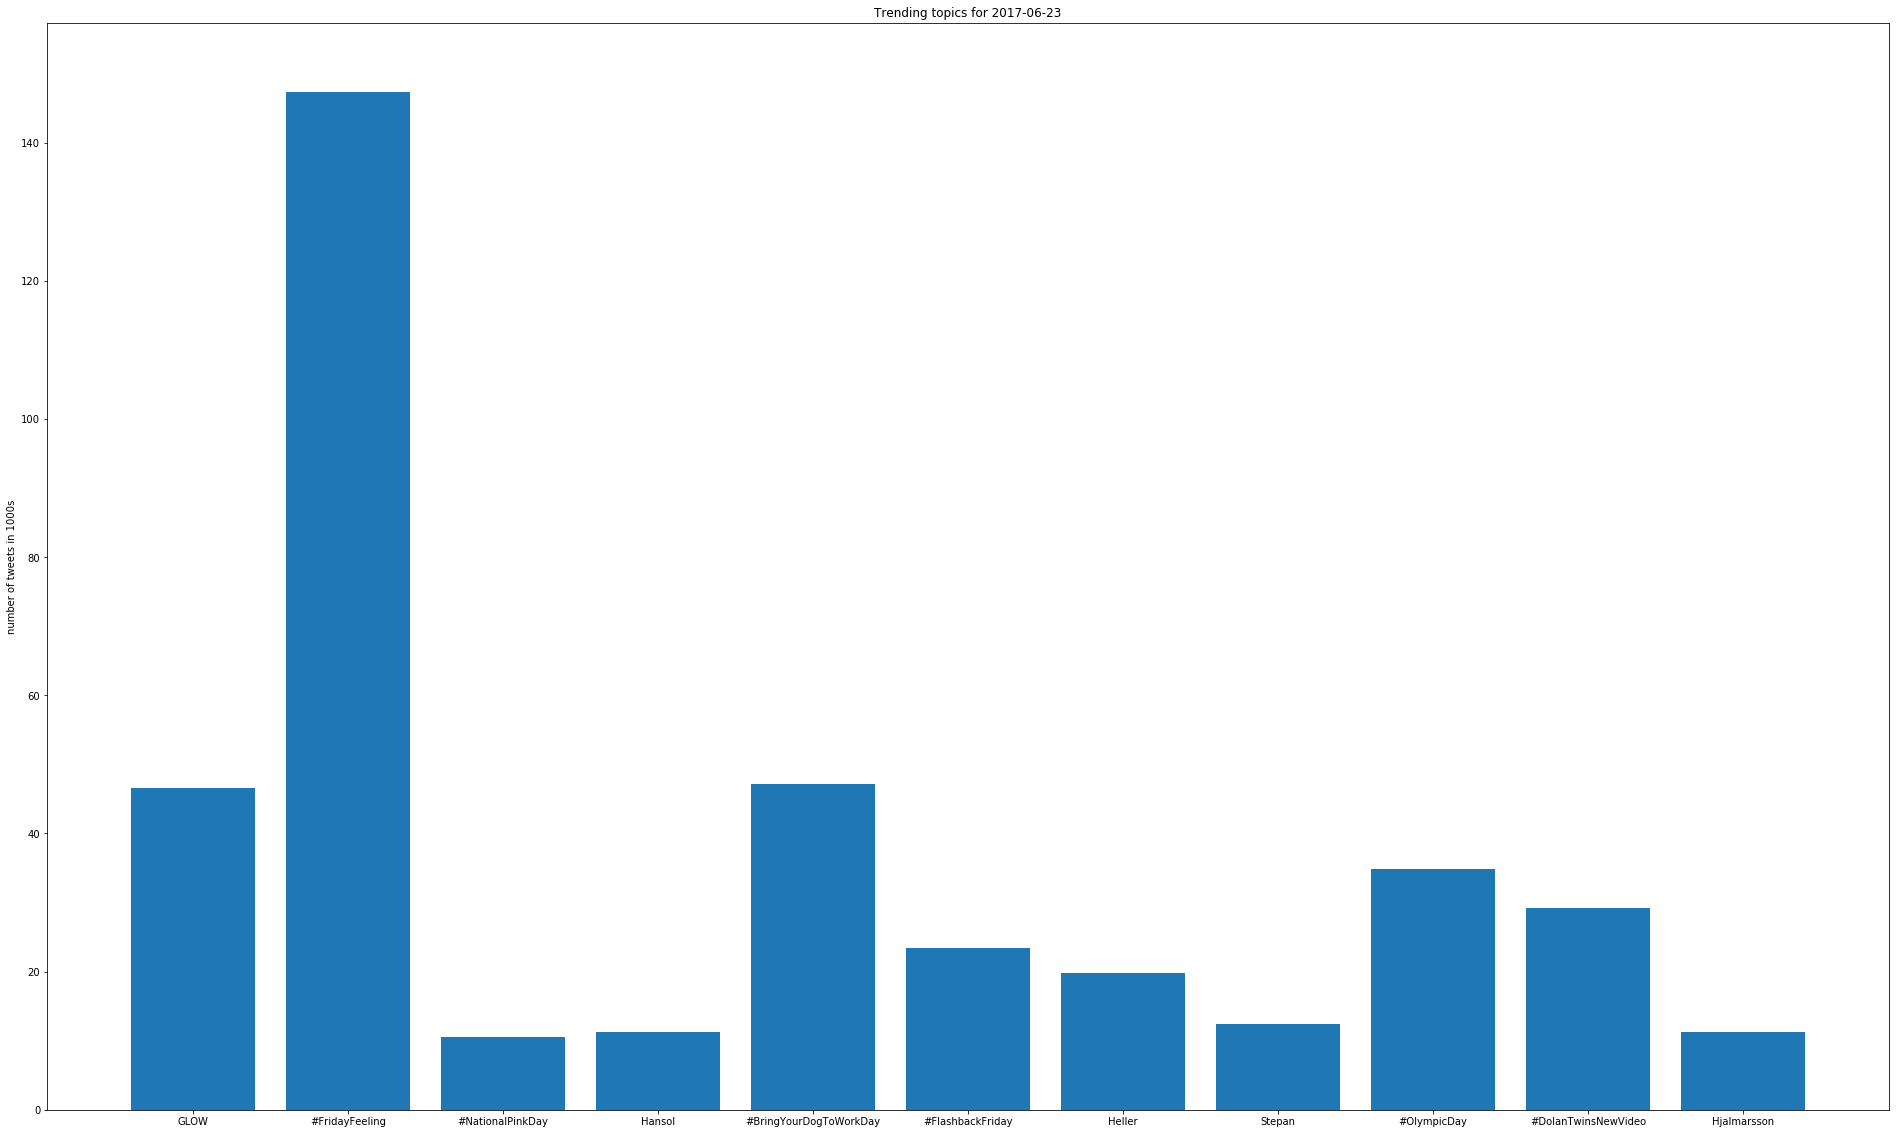

In [71]:
plt.figure(figsize=(len(trends)*3,20))
scaled_values = [i/1000 for i in trends.values()]
plt.bar(range(len(trends)), scaled_values, align='center')
plt.xticks(range(len(trends)), trends.keys())
plt.ylim(0,max(scaled_values)+10)
plt.ylabel('number of tweets in 1000s')
plt.title('Trending topics for %s' % time_[0])
plt.show()

In [76]:
time.ctime()

'Fri Jun 23 13:40:45 2017'

In [105]:
# ' '.join(time.ctime().split())#+time.ctime().split()[-1]

AttributeError: 'list' object has no attribute 'drop'

In [114]:
time.ctime().split()

TypeError: list indices must be integers or slices, not function

In [122]:
list(map(lambda x: x+1, [1,2,3]))

[2, 3, 4]

In [132]:
t = time.ctime().split()
cur_date = ' '.join(t[:3]+[t[-1]])

In [133]:
cur_date

'Fri Jun 23 2017'